# Ejercicio 4
Hallar el Texto Plano y la Llave, dado el Texto Cifrado

$$ CSYEVIXIVQMREXIH $$

*Pista:* La llave es un shift del alfabeto

In [2]:
# Definimos el texto cifrado
texto_cifrado = 'CSYEVIXIVQMREXIH'

# Definimos el alfabeto
alfabeto = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Definimos una función para desencriptar el texto
def desencriptar(texto_cifrado, llave):
    texto_plano = ''
    for letra in texto_cifrado:
        if letra in alfabeto:
            indice = alfabeto.index(letra)
            texto_plano += alfabeto[(indice - llave) % len(alfabeto)]
        else:
            texto_plano += letra
    return texto_plano
    
# Probamos con todas las llaves posibles
for llave in range(0, len(alfabeto)):
    texto_plano = desencriptar(texto_cifrado, llave)
    print(f'Llave: {llave}, Texto: {texto_plano}')

Llave: 0, Texto: CSYEVIXIVQMREXIH
Llave: 1, Texto: BRXDUHWHUPLQDWHG
Llave: 2, Texto: AQWCTGVGTOKPCVGF
Llave: 3, Texto: ZPVBSFUFSNJOBUFE
Llave: 4, Texto: YOUARETERMINATED
Llave: 5, Texto: XNTZQDSDQLHMZSDC
Llave: 6, Texto: WMSYPCRCPKGLYRCB
Llave: 7, Texto: VLRXOBQBOJFKXQBA
Llave: 8, Texto: UKQWNAPANIEJWPAZ
Llave: 9, Texto: TJPVMZOZMHDIVOZY
Llave: 10, Texto: SIOULYNYLGCHUNYX
Llave: 11, Texto: RHNTKXMXKFBGTMXW
Llave: 12, Texto: QGMSJWLWJEAFSLWV
Llave: 13, Texto: PFLRIVKVIDZERKVU
Llave: 14, Texto: OEKQHUJUHCYDQJUT
Llave: 15, Texto: NDJPGTITGBXCPITS
Llave: 16, Texto: MCIOFSHSFAWBOHSR
Llave: 17, Texto: LBHNERGREZVANGRQ
Llave: 18, Texto: KAGMDQFQDYUZMFQP
Llave: 19, Texto: JZFLCPEPCXTYLEPO
Llave: 20, Texto: IYEKBODOBWSXKDON
Llave: 21, Texto: HXDJANCNAVRWJCNM
Llave: 22, Texto: GWCIZMBMZUQVIBML
Llave: 23, Texto: FVBHYLALYTPUHALK
Llave: 24, Texto: EUAGXKZKXSOTGZKJ
Llave: 25, Texto: DTZFWJYJWRNSFYJI


In [3]:
print('Texto cifrado:', texto_cifrado)
print('Llave:', 4)
print('Texto plano:', desencriptar(texto_cifrado, 4))

Texto cifrado: CSYEVIXIVQMREXIH
Llave: 4
Texto plano: YOUARETERMINATED


## Conclusión
Por inspección, la llave es $4$ y el texto plano es $YOUARETERMINATED$.

# Ejercicio 9

Recuperar Texto Plano y Llave de un Cifrado por Sustitución Simple del Texto Cifrado:

$$ PBFPVYFBQXZTYFPBFEQJHDXXQVAPTPQJKTOYQWIPBVWLXTOXBTFXQWA $$
$$ XBVCXQWAXFQJVWLEQNTOZQGGQLFXQWAKVWLXQWAEBIPBFXFQVXGTVJV $$
$$ WLBTPQWAEBFPBFHCVLXBQUFEVWLXGDPEQVPQGVPPBFTIXPFHXZHVFAG $$
$$ FOTHFEFBQUFTDHZBQPOTHXTYFTODXQHFTDPTOGHFQPBQWAQJJTODXQH $$
$$ FOQPWTBDHHIXQVAPBFZQHCFWPFHPBFIPBQWKFABVYYDZBOTHPBQPQJT $$
$$ QOTOGHFQAPBFEQJHDXXQVAVXEBQPEFZBVFOJIWFFACFCCFHQWAUVWFL $$
$$ QHGFXVAFXQHFUFHILTTAVWAFFAWTEVOITDHFHFQAITIXPFHXAFQHEFZ $$
$$ QWGFLVWPTOFFA $$

Podemos solucionarlo mediante análisis de frecuencias

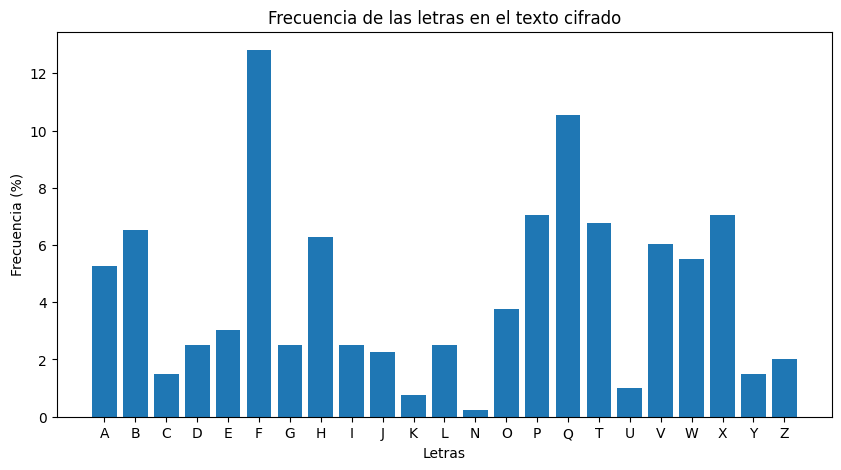

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

# Definimos el texto cifrado
texto_cifrado = 'PBFPVYFBQXZTYFPBFEQJHDXXQVAPTPQJKTOYQWIPBVWLXTOXBTFXQWAXBVCXQWAXFQJVWLEQNTOZQGGQLFXQWAKVWLXQWAEBIPBFXFQVXGTVJVWLBTPQWAEBFPBFHCVLXBQUFEVWLXGDPEQVPQGVPPBFTIXPFHXZHVFAGFOTHFEFBQUFTDHZBQPOTHXTYFTODXQHFTDPTOGHFQPBQWAQJJTODXQHFOQPWTBDHHIXQVAPBFZQHCFWPFHPBFIPBQWKFABVYYDZBOTHPBQPQJTQOTOGHFQAPBFEQJHDXXQVAVXEBQPEFZBVFOJIWFFACFCCFHQWAUVWFLQHGFXVAFXQHFUFHILTTAVWAFFAWTEVOITDHFHFQAITIXPFHXAFQHEFZQWGFLVWPTOFFA'

# Definir la frecuencia de las letras en el idioma inglés
frecuencias_ingles = {
    'A': 8.000395, 'B': 1.535701, 'C': 2.575785, 'D': 4.317924, 'E': 12.575645,
    'F': 2.350463, 'G': 1.982677, 'H': 6.236609, 'I': 6.920007, 'J': 0.145188,
    'K': 0.739906, 'L': 4.057231, 'M': 2.560994, 'N': 6.903785, 'O': 7.591270,
    'P': 1.795742, 'Q': 0.117571, 'R': 5.959034, 'S': 6.340880, 'T': 9.085226,
    'U': 2.841783, 'V': 0.981717, 'W': 2.224893, 'X': 0.179556, 'Y': 1.900888,
    'Z': 0.079130
}

# Definir una función para calcular la frecuencia de los n-gramas
def contar_ngramas(texto, n):
    ngramas = [texto[i:i+n] for i in range(len(texto) - n + 1)]
    ngramas_frecuencia = Counter(ngramas)
    return ngramas_frecuencia

# Hallar las frecuencias de las letras
frecuencias_letras = contar_ngramas(texto_cifrado, 1)

# Calcular la frecuencia de las letras en el texto cifrado
frecuencias_letras = dict(sorted(frecuencias_letras.items()))
frecuencias_letras = {k: v / len(texto_cifrado) * 100 for k, v in frecuencias_letras.items()}
frecuencias_letras = dict(sorted(frecuencias_letras.items()))

# Plotear las frecuencias de las letras en el texto cifrado
plt.figure(figsize=(10, 5))
plt.bar(frecuencias_letras.keys(), frecuencias_letras.values())
plt.xlabel('Letras')
plt.ylabel('Frecuencia (%)')
plt.title('Frecuencia de las letras en el texto cifrado')
plt.show()

Ya tenemos las frecuencias de las letras en nuestro texto. Ahora, vamos a compararlas con las frecuencias de las letras en el idioma inglés.

In [5]:
# Definir función que imprima en orden descendente n frecuencias del texto cifrado y del idioma inglés
def imprimir_frecuencias(frecuencias_texto, frecuencias_idioma, n):
    # Ordenar las frecuencias del texto cifrado
    frecuencias_texto = sorted(frecuencias_texto.items(), key=lambda item: item[1], reverse=True)[:n]
    # Ordenar las frecuencias del idioma inglés
    frecuencias_idioma = sorted(frecuencias_idioma.items(), key=lambda item: item[1], reverse=True)[:n]
    
    print(f"{'Texto Cifrado':<15} {'Frecuencia (%)':<25} {'Idioma':<15} {'Frecuencia (%)'}")
    print('-' * 75)
    
    for i in range(min(n, len(frecuencias_texto), len(frecuencias_idioma))):
        textocrifrado, textocifrado_frec = frecuencias_texto[i]
        textoingles, textoingles_frec = frecuencias_idioma[i]
        
        print(f"{textocrifrado:<15} {textocifrado_frec:<25.2f} {textoingles:<15} {textoingles_frec}")
        
# Imprimir las frecuencias de las letras en el texto cifrado y en el idioma inglés
imprimir_frecuencias(frecuencias_letras, frecuencias_ingles, 26)

Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
F               12.81                     E               12.575645
Q               10.55                     T               9.085226
P               7.04                      A               8.000395
X               7.04                      O               7.59127
T               6.78                      I               6.920007
B               6.53                      N               6.903785
H               6.28                      S               6.34088
V               6.03                      H               6.236609
W               5.53                      R               5.959034
A               5.28                      D               4.317924
O               3.77                      L               4.057231
E               3.02                      U               2.841783
D               2.51                      C     

Ahora realicemos el análisis con los bigramas, trigramas y cuatrigramas.


In [6]:
# Hallar las frecuencias de los bigramas
bigrams_ingles = {
    'TH': 3.882543, 'HE': 3.681391, 'IN': 2.283899, 'ER': 2.178042, 'AN': 2.140460,
    'RE': 1.749394, 'ND': 1.571977, 'ON': 1.418244, 'EN': 1.383239, 'AT': 1.335523,
    'OU': 1.285484, 'ED': 1.275779, 'HA': 1.274742, 'TO': 1.169655, 'OR': 1.151094,
    'IT': 1.134891, 'IS': 1.109877, 'HI': 1.092302, 'ES': 1.092301, 'NG': 1.053385
}

texto_cifrado_bigrams = contar_ngramas(texto_cifrado, 2)

# Calcular la frecuencia de los bigramas en el texto cifrado
texto_cifrado_bigrams = dict(sorted(texto_cifrado_bigrams.items()))
texto_cifrado_bigrams = {k: v / len(texto_cifrado) * 100 for k, v in texto_cifrado_bigrams.items()}
texto_cifrado_bigrams = dict(sorted(texto_cifrado_bigrams.items()))

# Imprimir las frecuencias de los bigramas en el texto cifrado y en el idioma inglés
imprimir_frecuencias(texto_cifrado_bigrams, bigrams_ingles, 15)

Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
PB              3.02                      TH              3.882543
QW              2.51                      HE              3.681391
XQ              2.51                      IN              2.283899
BF              2.26                      ER              2.178042
BQ              2.01                      AN              2.14046
HF              2.01                      RE              1.749394
TO              2.01                      ND              1.571977
VW              2.01                      ON              1.418244
WA              2.01                      EN              1.383239
FH              1.76                      AT              1.335523
FQ              1.51                      OU              1.285484
QH              1.51                      ED              1.275779
QJ              1.51                      HA    

In [19]:
# Hallar las frecuencias de los trigramas
trigramas_ingles = {
    'THE': 3.508232,
    'AND': 1.593878,
    'ING': 1.147042,
    'HER': 0.822444,
    'HAT': 0.650715,
    'HIS': 0.596748,
    'THA': 0.593593,
    'ERE': 0.560594,
    'FOR': 0.555372,
    'ENT': 0.530771,
    'ION': 0.506454,
    'TER': 0.461099,
    'WAS': 0.460487,
    'YOU': 0.437213,
    'ITH': 0.431250,
    'VER': 0.430732,
    'ALL': 0.422758,
    'WIT': 0.397290,
    'THI': 0.394796,
    'TIO': 0.378058
}

texto_cifrado_trigrams = contar_ngramas(texto_cifrado, 3)

# Calcular la frecuencia de los trigramas en el texto cifrado
texto_cifrado_trigrams = dict(sorted(texto_cifrado_trigrams.items()))
texto_cifrado_trigrams = {k: v / len(texto_cifrado) * 100 for k, v in texto_cifrado_trigrams.items()}
texto_cifrado_trigrams = dict(sorted(texto_cifrado_trigrams.items()))

# Imprimir las frecuencias de los trigramas en el texto cifrado y en el idioma inglés
imprimir_frecuencias(texto_cifrado_trigrams, trigramas_ingles, 20)


Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
PBF             2.01                      THE             3.508232
QWA             1.76                      AND             1.593878
VWL             1.26                      ING             1.147042
XQW             1.01                      HER             0.822444
BQP             0.75                      HAT             0.650715
FFA             0.75                      HIS             0.596748
FXQ             0.75                      THA             0.593593
HFQ             0.75                      ERE             0.560594
IPB             0.75                      FOR             0.555372
OTH             0.75                      ENT             0.530771
PBQ             0.75                      ION             0.506454
PFH             0.75                      TER             0.461099
QHF             0.75                      WAS  

In [8]:
# Hallar las frecuencias de los cuatrigramas
cuatrigramas_ingles = {
    "THAT": 0.761242,
    "THER": 0.604501,
    "WITH": 0.573866,
    "TION": 0.551919,
    "HERE": 0.374549,
    "OULD": 0.369920,
    "IGHT": 0.309440,
    "HAVE": 0.290544,
    "HICH": 0.284292,
    "WHIC": 0.283826,
    "THIS": 0.276333,
    "THIN": 0.270413,
    "THEY": 0.262421,
    "ATIO": 0.262386,
    "EVER": 0.260695,
    "FROM": 0.258580,
    "OUGH": 0.253447,
    "WERE": 0.231089,
    "HING": 0.229944
}

# Contar los cuatrigramas en el texto cifrado
texto_cifrado_cuatrigrams = contar_ngramas(texto_cifrado, 4)

# Calcular la frecuencia de los cuatrigramas en el texto cifrado
texto_cifrado_cuatrigrams = dict(sorted(texto_cifrado_cuatrigrams.items()))
texto_cifrado_cuatrigrams = {k: v / len(texto_cifrado) * 100 for k, v in texto_cifrado_cuatrigrams.items()}
texto_cifrado_cuatrigrams = dict(sorted(texto_cifrado_cuatrigrams.items()))

# Imprimir las frecuencias de los cuatrigramas en el texto cifrado y en el idioma inglés
imprimir_frecuencias(texto_cifrado_cuatrigrams, cuatrigramas_ingles, 20)

Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
XQWA            1.01                      THAT            0.761242
VWLX            0.75                      THER            0.604501
XQHF            0.75                      WITH            0.573866
XQVA            0.75                      TION            0.551919
APBF            0.50                      HERE            0.374549
BFEQ            0.50                      OULD            0.36992
BQUF            0.50                      IGHT            0.30944
DXQH            0.50                      HAVE            0.290544
DXXQ            0.50                      HICH            0.284292
EQJH            0.50                      WHIC            0.283826
FEQJ            0.50                      THIS            0.276333
FPBF            0.50                      THIN            0.270413
FXQW            0.50                      THEY   

Luego de revisar estos análisis de frecuencias, supongamos primero que:
- $F \rightarrow e$
- $Q \rightarrow t$
- $P \rightarrow a$
- $N \rightarrow x$
- $K \rightarrow k$
- $U \rightarrow v$

Las cuales corresponden a las primeras y las últimas letras con mayor frecuencia en el texto cifrado. Ahora, vamos a realizar un análisis de frecuencias de las letras en el texto cifrado, pero con las letras $F$, $Q$, $P$, $N$, $K$ y $U$ reemplazadas por $e$, $t$, $a$, $x$, $k$ y $v$, respectivamente.

In [9]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'F': 'e',
    'Q': 't',
    'P': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

a.ea..e.t....ea.e.t.....t..a.at.k...t..a..........e.t.......t...et.....tx...t..t.e.t..k....t.....a.e.et...........at....ea.e......tve.......a.t.at..aa.e...ae.....e..e...e.e.tve.....ta......e....t.e..a....eta.t..t......t.e.ta........t..a.e.t..e.ae.a.e.a.t.ke...........a.tat..t.....et.a.e.t.....t......ta.e...e....ee..e..e.t..v..e.t..e...e.t.eve.........ee..........e.et.....ae...et..e.t..e...a..ee.


Sin embargo, parece ser que la primer letra está incorrecta, además, revisando un poco el análisis con los bigramas y trigramas, podemos ver que:
- $PB \rightarrow th$
- $PBF \rightarrow the$

Por lo que nuestra primer hipótesis estaba un poco errónea, modifiquémosla a:
- $P \rightarrow t$
- $B \rightarrow h$
- $F \rightarrow e$
- $Q \rightarrow a$
- $N \rightarrow x$
- $K \rightarrow k$
- $U \rightarrow v$

In [10]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e',
    'Q': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

thet..eha....ethe.a.....a..t.ta.k...a..th.......h.e.a...h...a...ea.....ax...a..a.e.a..k....a...h.the.ea.........h.ta...hethe.....have.......t.a.ta..tthe...te.....e..e...e.ehave....hat......e....a.e..t....eatha..a......a.e.at..h.....a..the.a..e.te.the.tha.ke.h.....h...thata..a.....ea.the.a.....a.....hat.e.h.e....ee..e..e.a..v..e.a..e...e.a.eve.........ee..........e.ea.....te...ea..e.a..e...t..ee.


Podemos ver que la primera letra parece ser "$the$", por lo que nuestra hipótesis parece ser correcta (a esto llega el ejemplo).

Por los trigramas, podríamos suponer que: $QWA \rigtharrow and, veamos:

In [11]:
# Veamos primero la palabra que tenemos segura
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

thet..eh.....ethe..........t.t.........th.......h.e.....h.......e................e.............h.the.e..........h.t....hethe.....h..e.......t...t...tthe...te.....e..e...e.eh..e....h.t......e......e..t....e.th............e..t..h........the....e.te.the.th...e.h.....h...th.t.........e..the.............h.t.e.h.e....ee..e..e.......e....e...e...e.e.........ee..........e.e......te...e...e....e...t..ee.


In [12]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e',
    'Q': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v',
    'W': 'n',
    'A': 'd'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

thet..eha....ethe.a.....a.dt.ta.k...an.th.n.....h.e.and.h...and.ea..n..ax...a..a.e.andk.n..and.h.the.ea.......n.h.tand.hethe.....have..n....t.a.ta..tthe...te.....ed.e...e.ehave....hat......e....a.e..t....eathanda......a.e.atn.h.....a.dthe.a..ente.the.thankedh.....h...thata..a.....eadthe.a.....a.d...hat.e.h.e...need.e..e.andv.ne.a..e..de.a.eve.....d.ndeedn........e.ead....te..dea..e.an.e..nt..eed


Por los trigramas, podríamos suponer que $VWL \rightarrow ing$, veamos:

In [13]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e',
    'Q': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v',
    'W': 'n',
    'A': 'd',
    'V': 'i',
    'L': 'g'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

theti.eha....ethe.a.....aidt.ta.k...an.thing....h.e.and.hi..and.ea.ing.ax...a..age.andking.and.h.the.eai...i.ingh.tand.hethe..ig.have.ing...t.aita.itthe...te....ied.e...e.ehave....hat......e....a.e..t....eathanda......a.e.atn.h.....aidthe.a..ente.the.thankedhi....h...thata..a.....eadthe.a.....aidi..hat.e.hie...need.e..e.andvinega..e.ide.a.eve..g..dindeedn..i.....e.ead....te..dea..e.an.egint..eed


Supongamos que la segunda palabra es "time", por lo que:

In [14]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e',
    'Q': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v',
    'W': 'n',
    'A': 'd',
    'V': 'i',
    'L': 'g',
    'Y': 'm'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

thetimeha...methe.a.....aidt.ta.k..man.thing....h.e.and.hi..and.ea.ing.ax...a..age.andking.and.h.the.eai...i.ingh.tand.hethe..ig.have.ing...t.aita.itthe...te....ied.e...e.ehave....hat.....me....a.e..t....eathanda......a.e.atn.h.....aidthe.a..ente.the.thankedhimm..h...thata..a.....eadthe.a.....aidi..hat.e.hie...need.e..e.andvinega..e.ide.a.eve..g..dindeedn..i.....e.ead....te..dea..e.an.egint..eed


Podría tener sentido, supongamos ahora que la tercer palabra es "has", por lo que:

In [15]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e',
    'Q': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v',
    'W': 'n',
    'A': 'd',
    'V': 'i',
    'L': 'g',
    'Y': 'm',
    'X': 's'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

thetimehas..methe.a...ssaidt.ta.k..man.things..sh.esandshi.sandsea.ing.ax...a..agesandkingsand.h.theseais..i.ingh.tand.hethe..igshave.ings..t.aita.itthe..ste.s..ied.e...e.ehave....hat...s.me...sa.e..t....eathanda.....sa.e.atn.h....saidthe.a..ente.the.thankedhimm..h...thata..a.....eadthe.a...ssaidis.hat.e.hie...need.e..e.andvinega..esidesa.eve..g..dindeedn..i.....e.ead...ste.sdea..e.an.egint..eed


Una vez revisados cuales casos se han tomado tanto de los monogramas como de los bigramas, podríamos intentar hacer $H \rightarrow r$ por lo que:

In [21]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e',
    'Q': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v',
    'W': 'n',
    'A': 'd',
    'V': 'i',
    'L': 'g',
    'Y': 'm',
    'X': 's',
    'H': 'r',
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

thetimehas..methe.a.r.ssaidt.ta.k..man.things..sh.esandshi.sandsea.ing.ax...a..agesandkingsand.h.theseais..i.ingh.tand.hether.igshave.ings..t.aita.itthe..sters.ried.e..re.ehave..r.hat..rs.me...sare..t...reathanda.....sare.atn.h.rr.saidthe.ar.enterthe.thankedhimm..h..rthata..a....readthe.a.r.ssaidis.hat.e.hie...need.e..erandvinegar.esidesarever.g..dindeedn..i....reread...stersdear.e.an.egint..eed


Revisando ahora los trigramas, podríamos suponer que $OTH \rightarrow for$, por lo que:

In [22]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e',
    'Q': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v',
    'W': 'n',
    'A': 'd',
    'V': 'i',
    'L': 'g',
    'Y': 'm',
    'X': 's',
    'H': 'r',
    'T': 'o',
    'O': 'f'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

thetimehas.omethe.a.r.ssaidtota.kofman.thingsofshoesandshi.sandsea.ing.axof.a..agesandkingsand.h.theseais.oi.inghotand.hether.igshave.ings..t.aita.ittheo.sters.ried.efore.ehaveo.r.hatforsomeof.sareo.tof.reathanda..of.sarefatnoh.rr.saidthe.ar.enterthe.thankedhimm..hforthata.oafof.readthe.a.r.ssaidis.hat.e.hief..need.e..erandvinegar.esidesarever.goodindeedno.if.o.reread.o.stersdear.e.an.egintofeed


Ahora, podríamos notar que la cuarta palabra, con las letras disponibles que nos quedan podría ser "come", por lo que:

In [23]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e',
    'Q': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v',
    'W': 'n',
    'A': 'd',
    'V': 'i',
    'L': 'g',
    'Y': 'm',
    'X': 's',
    'H': 'r',
    'T': 'o',
    'O': 'f',
    'Z': 'c'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

thetimehascomethe.a.r.ssaidtota.kofman.thingsofshoesandshi.sandsea.ing.axofca..agesandkingsand.h.theseais.oi.inghotand.hether.igshave.ings..t.aita.ittheo.sterscried.efore.ehaveo.rchatforsomeof.sareo.tof.reathanda..of.sarefatnoh.rr.saidthecar.enterthe.thankedhimm.chforthata.oafof.readthe.a.r.ssaidis.hat.echief..need.e..erandvinegar.esidesarever.goodindeedno.if.o.reread.o.stersdear.ecan.egintofeed


Detectamos una posible palabra, "total", de donde $J \rightarrow l$, por lo que:

In [26]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e',
    'Q': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v',
    'W': 'n',
    'A': 'd',
    'V': 'i',
    'L': 'g',
    'Y': 'm',
    'X': 's',
    'H': 'r',
    'T': 'o',
    'O': 'f',
    'Z': 'c',
    'J': 'l'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

thetimehascomethe.alr.ssaidtotalkofman.thingsofshoesandshi.sandsealing.axofca..agesandkingsand.h.theseais.oilinghotand.hether.igshave.ings..t.aita.ittheo.sterscried.efore.ehaveo.rchatforsomeof.sareo.tof.reathandallof.sarefatnoh.rr.saidthecar.enterthe.thankedhimm.chforthataloafof.readthe.alr.ssaidis.hat.echiefl.need.e..erandvinegar.esidesarever.goodindeedno.if.o.reread.o.stersdear.ecan.egintofeed


Podríamos tener al final "begin to feed" $G \rightarrow b$, por lo que:

In [27]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e',
    'Q': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v',
    'W': 'n',
    'A': 'd',
    'V': 'i',
    'L': 'g',
    'Y': 'm',
    'X': 's',
    'H': 'r',
    'T': 'o',
    'O': 'f',
    'Z': 'c',
    'J': 'l',
    'G': 'b'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

thetimehascomethe.alr.ssaidtotalkofman.thingsofshoesandshi.sandsealing.axofcabbagesandkingsand.h.theseaisboilinghotand.hether.igshave.ingsb.t.aitabittheo.sterscriedbefore.ehaveo.rchatforsomeof.sareo.tofbreathandallof.sarefatnoh.rr.saidthecar.enterthe.thankedhimm.chforthataloafofbreadthe.alr.ssaidis.hat.echiefl.need.e..erandvinegarbesidesarever.goodindeedno.if.o.reread.o.stersdear.ecanbegintofeed


Detectamos una posible palabra, "very good", por lo que $I \rightarrow y$, por lo que:

In [28]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e',
    'Q': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v',
    'W': 'n',
    'A': 'd',
    'V': 'i',
    'L': 'g',
    'Y': 'm',
    'X': 's',
    'H': 'r',
    'T': 'o',
    'O': 'f',
    'Z': 'c',
    'J': 'l',
    'G': 'b',
    'I': 'y'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

thetimehascomethe.alr.ssaidtotalkofmanythingsofshoesandshi.sandsealing.axofcabbagesandkingsand.hytheseaisboilinghotand.hether.igshave.ingsb.t.aitabittheoysterscriedbefore.ehaveo.rchatforsomeof.sareo.tofbreathandallof.sarefatnoh.rrysaidthecar.entertheythankedhimm.chforthataloafofbreadthe.alr.ssaidis.hat.echieflyneed.e..erandvinegarbesidesareverygoodindeedno.ifyo.rereadyoystersdear.ecanbegintofeed


In [29]:
# Imprimo el reemplazado con las posibles letras faltantes
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else letra for letra in texto_cifrado])

print(texto_cifrado_reemplazado)

thetimehascometheEalrDssaidtotalkofmanythingsofshoesandshiCsandsealingEaxofcabbagesandkingsandEhytheseaisboilinghotandEhetherCigshaveEingsbDtEaitabittheoysterscriedbeforeEehaveoDrchatforsomeofDsareoDtofbreathandallofDsarefatnohDrrysaidthecarCentertheythankedhimmDchforthataloafofbreadtheEalrDssaidisEhatEechieflyneedCeCCerandvinegarbesidesareverygoodindeednoEifyoDrereadyoystersdearEecanbegintofeed


Revisando las letras que nos faltan podemos terminar de reemplazar las que necesitamos, por lo que:

In [42]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'P': 't',
    'B': 'h',
    'F': 'e',
    'Q': 'a',
    'N': 'x',
    'K': 'k',
    'U': 'v',
    'W': 'n',
    'A': 'd',
    'V': 'i',
    'L': 'g',
    'Y': 'm',
    'X': 's',
    'H': 'r',
    'T': 'o',
    'O': 'f',
    'Z': 'c',
    'J': 'l',
    'G': 'b',
    'I': 'y',
    'D': 'u',
    'E': 'w',
    'C': 'p'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

thetimehascomethewalrussaidtotalkofmanythingsofshoesandshipsandsealingwaxofcabbagesandkingsandwhytheseaisboilinghotandwhetherpigshavewingsbutwaitabittheoysterscriedbeforewehaveourchatforsomeofusareoutofbreathandallofusarefatnohurrysaidthecarpentertheythankedhimmuchforthataloafofbreadthewalrussaidiswhatwechieflyneedpepperandvinegarbesidesareverygoodindeednowifyourereadyoystersdearwecanbegintofeed


## Conclusión
Podemos ver que el texto plano obtenido tiene sentido y que, a pesar de que algunas suposiciones no eran del todo ciertas, nos permitieron llegar a la solución. Por lo que, el texto plano es:

the time has come the walrus said to talk of many things of shoes and ships and sealing wax of cabbages and kings and why the sea is boiling hot and whether pigs have wings but wait a bit the oysters cried before we have our chat for some of us are out of breath and all of us are fat no hurry said the carpenter they thanked him much for that a loaf of bread the walrus said is what we chiefly need pepper and vinegar besides are very good indeed now if youre ready oysters dear we can begin to feed

# Punto 10
Determinar el Texto Plano y la Llave del Texto Cifrado que se Muestra a Continuación:

$$ MXDXBVTZWVMXNSPBQXLIMSCCSGXSCJXBOVQXCJZMOJZCVC $$
$$ TVWJCZAAXZBCSSCJXBQCJZCOJZCNSPOXBXSBTVWJCJZDXG $$
$$ XXMOZQMSCSCJXBOVQXCJZMOJZCNSPJZHGXXMOSPLHJZDXZ $$
$$ AAXZBXHCSCJXTCSGXSCJXBOVQX $$

*Pista:* El mensaje fue encriptado con un cifrador de sustitución simple y el Texto Plano no tiene espacios ni puntuación.

Podemos solucionarlo mediante análisis de frecuencias

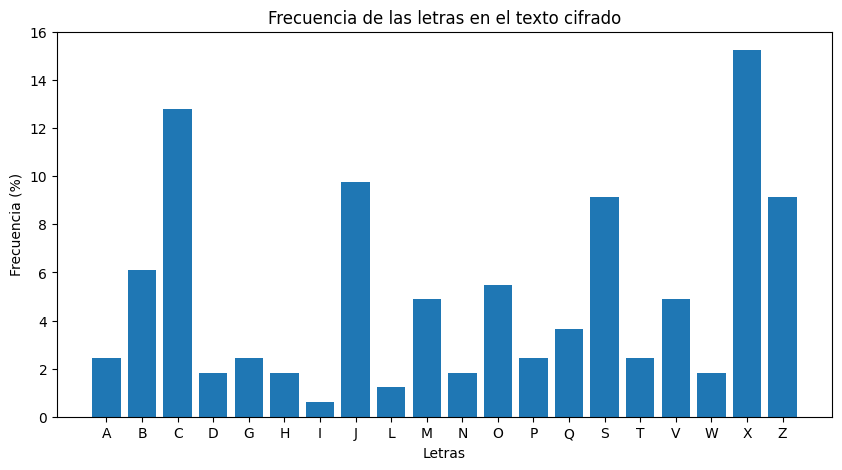

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Definimos el texto cifrado
texto_cifrado = 'MXDXBVTZWVMXNSPBQXLIMSCCSGXSCJXBOVQXCJZMOJZCVCTVWJCZAAXZBCSSCJXBQCJZCOJZCNSPOXBXSBTVWJCJZDXGXXMOZQMSCSCJXBOVQXCJZMOJZCNSPJZHGXXMOSPLHJZDXZAAXZBXHCSCJXTCSGXSCJXBOVQX'

# Definir la frecuencia de las letras en el idioma inglés
frecuencias_ingles = {
    'A': 8.000395, 'B': 1.535701, 'C': 2.575785, 'D': 4.317924, 'E': 12.575645,
    'F': 2.350463, 'G': 1.982677, 'H': 6.236609, 'I': 6.920007, 'J': 0.145188,
    'K': 0.739906, 'L': 4.057231, 'M': 2.560994, 'N': 6.903785, 'O': 7.591270,
    'P': 1.795742, 'Q': 0.117571, 'R': 5.959034, 'S': 6.340880, 'T': 9.085226,
    'U': 2.841783, 'V': 0.981717, 'W': 2.224893, 'X': 0.179556, 'Y': 1.900888,
    'Z': 0.079130
}

# Definir una función para calcular la frecuencia de los n-gramas
def contar_ngramas(texto, n):
    ngramas = [texto[i:i+n] for i in range(len(texto) - n + 1)]
    ngramas_frecuencia = Counter(ngramas)
    return ngramas_frecuencia

# Hallar las frecuencias de las letras
frecuencias_letras = contar_ngramas(texto_cifrado, 1)

# Calcular la frecuencia de las letras en el texto cifrado
frecuencias_letras = dict(sorted(frecuencias_letras.items()))
frecuencias_letras = {k: v / len(texto_cifrado) * 100 for k, v in frecuencias_letras.items()}
frecuencias_letras = dict(sorted(frecuencias_letras.items()))

# Plotear las frecuencias de las letras en el texto cifrado
plt.figure(figsize=(10, 5))
plt.bar(frecuencias_letras.keys(), frecuencias_letras.values())
plt.xlabel('Letras')
plt.ylabel('Frecuencia (%)')
plt.title('Frecuencia de las letras en el texto cifrado')
plt.show()

Ya tenemos las frecuencias de las letras en nuestro texto. Ahora, vamos a compararlas con las frecuencias de las letras en el idioma inglés.

In [7]:
# Definir función que imprima en orden descendente n frecuencias del texto cifrado y del idioma inglés
def imprimir_frecuencias(frecuencias_texto, frecuencias_idioma, n):
    # Ordenar las frecuencias del texto cifrado
    frecuencias_texto = sorted(frecuencias_texto.items(), key=lambda item: item[1], reverse=True)[:n]
    # Ordenar las frecuencias del idioma inglés
    frecuencias_idioma = sorted(frecuencias_idioma.items(), key=lambda item: item[1], reverse=True)[:n]
    
    print(f"{'Texto Cifrado':<15} {'Frecuencia (%)':<25} {'Idioma':<15} {'Frecuencia (%)'}")
    print('-' * 75)
    
    for i in range(min(n, len(frecuencias_texto), len(frecuencias_idioma))):
        textocrifrado, textocifrado_frec = frecuencias_texto[i]
        textoingles, textoingles_frec = frecuencias_idioma[i]
        
        print(f"{textocrifrado:<15} {textocifrado_frec:<25.2f} {textoingles:<15} {textoingles_frec}")
        
# Imprimir las frecuencias de las letras en el texto cifrado y en el idioma inglés
imprimir_frecuencias(frecuencias_letras, frecuencias_ingles, 26)

Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
X               15.24                     E               12.575645
C               12.80                     T               9.085226
J               9.76                      A               8.000395
S               9.15                      O               7.59127
Z               9.15                      I               6.920007
B               6.10                      N               6.903785
O               5.49                      S               6.34088
M               4.88                      H               6.236609
V               4.88                      R               5.959034
Q               3.66                      D               4.317924
A               2.44                      L               4.057231
G               2.44                      U               2.841783
P               2.44                      C     

Ahora realicemos el análisis con los bigramas, trigramas y cuatrigramas.

In [8]:
# Hallar las frecuencias de los bigramas
bigrams_ingles = {
    'TH': 3.882543, 'HE': 3.681391, 'IN': 2.283899, 'ER': 2.178042, 'AN': 2.140460,
    'RE': 1.749394, 'ND': 1.571977, 'ON': 1.418244, 'EN': 1.383239, 'AT': 1.335523,
    'OU': 1.285484, 'ED': 1.275779, 'HA': 1.274742, 'TO': 1.169655, 'OR': 1.151094,
    'IT': 1.134891, 'IS': 1.109877, 'HI': 1.092302, 'ES': 1.092301, 'NG': 1.053385
}

texto_cifrado_bigrams = contar_ngramas(texto_cifrado, 2)

# Calcular la frecuencia de los bigramas en el texto cifrado
texto_cifrado_bigrams = dict(sorted(texto_cifrado_bigrams.items()))
texto_cifrado_bigrams = {k: v / len(texto_cifrado) * 100 for k, v in texto_cifrado_bigrams.items()}
texto_cifrado_bigrams = dict(sorted(texto_cifrado_bigrams.items()))

# Imprimir las frecuencias de los bigramas en el texto cifrado y en el idioma inglés
imprimir_frecuencias(texto_cifrado_bigrams, bigrams_ingles, 15)

Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
CJ              5.49                      TH              3.882543
JZ              5.49                      HE              3.681391
SC              4.27                      IN              2.283899
XB              3.66                      ER              2.178042
CS              3.05                      AN              2.14046
JX              3.05                      RE              1.749394
GX              2.44                      ND              1.571977
MO              2.44                      ON              1.418244
QX              2.44                      EN              1.383239
SP              2.44                      AT              1.335523
ZC              2.44                      OU              1.285484
BO              1.83                      ED              1.275779
DX              1.83                      HA    

In [9]:
# Hallar las frecuencias de los trigramas
trigramas_ingles = {
    'THE': 3.508232,
    'AND': 1.593878,
    'ING': 1.147042,
    'HER': 0.822444,
    'HAT': 0.650715,
    'HIS': 0.596748,
    'THA': 0.593593,
    'ERE': 0.560594,
    'FOR': 0.555372,
    'ENT': 0.530771,
    'ION': 0.506454,
    'TER': 0.461099,
    'WAS': 0.460487,
    'YOU': 0.437213,
    'ITH': 0.431250,
    'VER': 0.430732,
    'ALL': 0.422758,
    'WIT': 0.397290,
    'THI': 0.394796,
    'TIO': 0.378058
}

texto_cifrado_trigrams = contar_ngramas(texto_cifrado, 3)

# Calcular la frecuencia de los trigramas en el texto cifrado
texto_cifrado_trigrams = dict(sorted(texto_cifrado_trigrams.items()))
texto_cifrado_trigrams = {k: v / len(texto_cifrado) * 100 for k, v in texto_cifrado_trigrams.items()}
texto_cifrado_trigrams = dict(sorted(texto_cifrado_trigrams.items()))

# Imprimir las frecuencias de los trigramas en el texto cifrado y en el idioma inglés
imprimir_frecuencias(texto_cifrado_trigrams, trigramas_ingles, 20)


Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
CJX             3.05                      THE             3.508232
SCJ             3.05                      AND             1.593878
CJZ             2.44                      ING             1.147042
JXB             2.44                      HER             0.822444
JZC             2.44                      HAT             0.650715
BOV             1.83                      HIS             0.596748
NSP             1.83                      THA             0.593593
OJZ             1.83                      ERE             0.560594
OVQ             1.83                      FOR             0.555372
VQX             1.83                      ENT             0.530771
XBO             1.83                      ION             0.506454
AAX             1.22                      TER             0.461099
AXZ             1.22                      WAS  

In [10]:
# Hallar las frecuencias de los cuatrigramas
cuatrigramas_ingles = {
    "THAT": 0.761242,
    "THER": 0.604501,
    "WITH": 0.573866,
    "TION": 0.551919,
    "HERE": 0.374549,
    "OULD": 0.369920,
    "IGHT": 0.309440,
    "HAVE": 0.290544,
    "HICH": 0.284292,
    "WHIC": 0.283826,
    "THIS": 0.276333,
    "THIN": 0.270413,
    "THEY": 0.262421,
    "ATIO": 0.262386,
    "EVER": 0.260695,
    "FROM": 0.258580,
    "OUGH": 0.253447,
    "WERE": 0.231089,
    "HING": 0.229944
}

# Contar los cuatrigramas en el texto cifrado
texto_cifrado_cuatrigrams = contar_ngramas(texto_cifrado, 4)

# Calcular la frecuencia de los cuatrigramas en el texto cifrado
texto_cifrado_cuatrigrams = dict(sorted(texto_cifrado_cuatrigrams.items()))
texto_cifrado_cuatrigrams = {k: v / len(texto_cifrado) * 100 for k, v in texto_cifrado_cuatrigrams.items()}
texto_cifrado_cuatrigrams = dict(sorted(texto_cifrado_cuatrigrams.items()))

# Imprimir las frecuencias de los cuatrigramas en el texto cifrado y en el idioma inglés
imprimir_frecuencias(texto_cifrado_cuatrigrams, cuatrigramas_ingles, 20)

Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
SCJX            3.05                      THAT            0.761242
CJXB            2.44                      THER            0.604501
BOVQ            1.83                      WITH            0.573866
JXBO            1.83                      TION            0.551919
OJZC            1.83                      HERE            0.374549
OVQX            1.83                      OULD            0.36992
XBOV            1.83                      IGHT            0.30944
AAXZ            1.22                      HAVE            0.290544
AXZB            1.22                      HICH            0.284292
CJZM            1.22                      WHIC            0.283826
CNSP            1.22                      THIS            0.276333
CSCJ            1.22                      THIN            0.270413
CSGX            1.22                      THEY   

En primer lugar, con el análisis de frecuencias por monogramas, reemplacemos las 3 letras más repetidas y las 3 que menos se repiten. Así, tenemos que:

- $X \rightarrow e$
- $C \rightarrow t$
- $J \rightarrow a$
- $W \rightarrow y$
- $L \rightarrow p$
- $I \rightarrow b$

In [12]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'a',
    'W': 'y',
    'L': 'p',
    'I': 'b'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

.e.e....y..e.....epb..tt..e.the....eth...h.t.t..yht...e..t..the..th.t.h.t....e.e....yhth..e.ee......t.the....eth...h.t...h...ee....p.h..e...e..e.t.the.t..e.the....e


Sin embargo, analizando los bigramas, hay alta probabilidad de que $J \rightarrow h$, por lo que, cambiemos la asignación:

In [13]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'S': 'a',
    'W': 'y',
    'L': 'p',
    'I': 'b'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

.e.e....y..e.a...epb.atta.eathe....eth...h.t.t..yht...e..taathe..th.t.h.t.a..e.ea...yhth..e.ee.....atathe....eth...h.t.a.h...ee..a.p.h..e...e..e.tathe.ta.eathe....e


In [14]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'S': 'a',
    'W': 'y',
    'L': 'p',
    'I': 'b',
    'B': 'r'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

.e.er...y..e.a.r.epb.atta.eather...eth...h.t.t..yht...e.rtaather.th.t.h.t.a..erear..yhth..e.ee.....atather...eth...h.t.a.h...ee..a.p.h..e...e.re.tathe.ta.eather...e
